In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
original_df = pd.read_csv('weather_data.csv', low_memory=False)

In [3]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82536 entries, 0 to 82535
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TIME UTC                      82536 non-null  object 
 1   Temp Definition °C            82287 non-null  float64
 2   Dew Point Definition °C       82288 non-null  float64
 3   Rel Hum Definition %          82288 non-null  float64
 4   Precip. Amount Definition mm  82288 non-null  float64
 5   Wind Dir Definition 10's deg  38548 non-null  float64
 6   Wind Spd Definition km/h      38548 non-null  float64
 7   Visibility Definition km      0 non-null      float64
 8   Stn Press Definition kPa      82288 non-null  float64
 9   Hmdx Definition               13528 non-null  float64
 10  Wind Chill Definition         0 non-null      float64
 11  Weather Definition            82288 non-null  object 
dtypes: float64(10), object(2)
memory usage: 7.6+ MB


In [4]:
processed_df = pd.read_csv("preProcessedData.csv", low_memory=False)

processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3439 entries, 0 to 3438
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              3439 non-null   int64  
 1   Month             3439 non-null   int64  
 2   Day               3439 non-null   int64  
 3   Temp_mean         3439 non-null   float64
 4   Temp_max          3439 non-null   float64
 5   Temp_min          3439 non-null   float64
 6   DewPoint_mean     3439 non-null   float64
 7   DewPoint_max      3439 non-null   float64
 8   DewPoint_min      3439 non-null   float64
 9   RelHum_mean       3439 non-null   float64
 10  RelHum_max        3439 non-null   float64
 11  RelHum_min        3439 non-null   float64
 12  PrecipAmount_sum  3439 non-null   float64
 13  StnPress_mean     3439 non-null   float64
 14  StnPress_max      3439 non-null   float64
 15  StnPress_min      3439 non-null   float64
dtypes: float64(13), int64(3)
memory usage: 430

In [5]:
processed_df.head()

,Year,Month,Day,Temp_mean,Temp_max,Temp_min,DewPoint_mean,DewPoint_max,DewPoint_min,RelHum_mean,RelHum_max,RelHum_min,PrecipAmount_sum,StnPress_mean,StnPress_max,StnPress_min
0,2015,1,1,-5.092,-2.4,-6.8,-12.758,-10.9,-15.9,55.125,62.0,45.0,0.0,99.931,100.45,99.53
1,2015,1,2,-1.729,-0.7,-3.1,-8.804,-4.0,-11.9,59.250,85.0,45.0,0.0,100.519,101.31,99.73
2,2015,1,3,-1.417,1.0,-3.6,-5.121,0.6,-10.6,76.750,99.0,56.0,8.7,101.142,101.62,99.98
3,2015,1,4,2.854,4.7,1.4,1.988,3.9,-2.0,94.333,100.0,75.0,13.7,99.089,99.87,98.55
4,2015,1,5,-7.196,0.1,-11.7,-12.212,-0.7,-18.8,67.833,95.0,54.0,0.8,100.647,101.61,99.43


In [6]:
Q1 = processed_df[['Temp_mean', 'DewPoint_mean', 'RelHum_mean', 'PrecipAmount_sum', 'StnPress_mean']].quantile(0.25)

Q3 = processed_df[['Temp_mean', 'DewPoint_mean', 'RelHum_mean', 'PrecipAmount_sum', 'StnPress_mean']].quantile(0.75)

IQR = Q3 - Q1

print("Q1: ", Q1, "\n")
print("Q3: ", Q3, "\n")
print("IQR: ", IQR, "\n")

Q1:  Temp_mean            2.0375
DewPoint_mean       -3.7670
RelHum_mean         57.7920
PrecipAmount_sum     0.0000
StnPress_mean       99.7785
Name: 0.25, dtype: float64 

Q3:  Temp_mean            19.1120
DewPoint_mean        11.4165
RelHum_mean          73.4790
PrecipAmount_sum      1.3000
StnPress_mean       100.7145
Name: 0.75, dtype: float64 

IQR:  Temp_mean           17.0745
DewPoint_mean       15.1835
RelHum_mean         15.6870
PrecipAmount_sum     1.3000
StnPress_mean        0.9360
dtype: float64 



<Axes: >

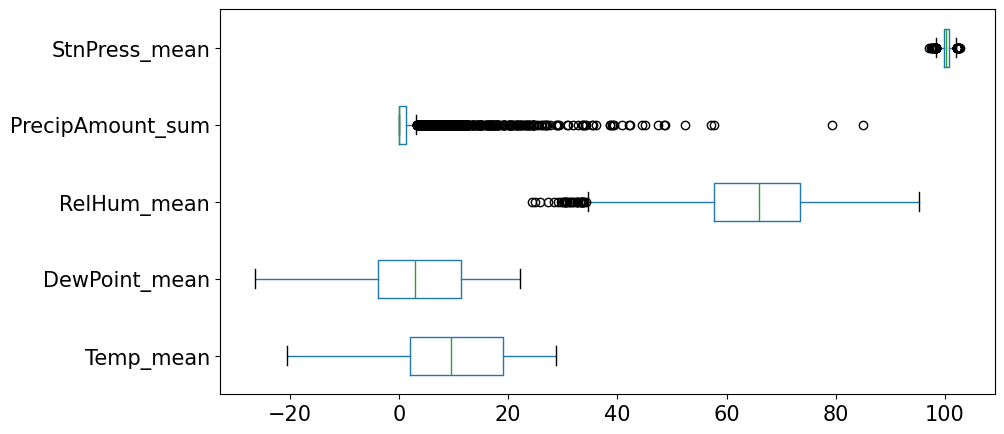

In [7]:
processed_df[['Temp_mean', 'DewPoint_mean', \
              'RelHum_mean', 'PrecipAmount_sum', 'StnPress_mean']] \
            .boxplot(grid=False, vert=False, fontsize=15, figsize=(10, 5))

In [8]:
processed_df[['Temp_mean', 'DewPoint_mean', \
              'RelHum_mean', 'PrecipAmount_sum', 'StnPress_mean']] \
            .describe()

,Temp_mean,DewPoint_mean,RelHum_mean,PrecipAmount_sum,StnPress_mean
count,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000
mean,9.911634,3.213395,65.379223,2.209218,100.242320
std,10.047182,9.594449,12.105542,5.869038,0.724695
min,-20.504000,-26.329000,24.458000,0.000000,97.090000
25%,2.037500,-3.767000,57.792000,0.000000,99.778500
50%,9.588000,2.921000,66.000000,0.000000,100.240000
75%,19.112000,11.416500,73.479000,1.300000,100.714500
max,28.742000,22.221000,95.292000,84.900000,102.680000


In [9]:
processed_df[['StnPress_mean']].boxplot(grid=False, vert=False, fontsize=15, figsize=(10, 5))

<Axes: >

In [10]:
processed_df[['PrecipAmount_sum']].boxplot(grid=False, vert=False, fontsize=15, figsize=(10, 5))

<Axes: >

### Fill humidex index column

- Setup humidex calculate function

$$H = T_{air} + \frac{5}{9} (6.11 exp(5417.7530(\frac{1}{273.15} - \frac{1}{273.15 + T_{dew}})) - 10)$$

  - **Where:**
    - **$H$:** denotes the Humidex
    - **$T_{air}$:** is the air temperature in °C
    - **$T_{dew}$:** is the dewpoint temperature in °C
    - **$exp$:** is the exponential function

  - _Reference: [Wikipedia](https://en.wikipedia.org/wiki/Humidex)_

In [11]:
def hmdx_cal(temp, dew):
    try:
        temp = float(temp)
        dew = float(dew)
    except(ValueError, TypeError):
        return -1
    
    result = temp + (5/9) * (6.11 * math.exp(5417.7530 * ((1 / 273.15)-(1 / (273.15 + dew))))-10)

    return max(result, 0) # Because if humidex < 0, then it is not necessary

- Use `hmdx_cal` to calculate humidex

In [22]:
processed_df['HMDX'] = processed_df.apply(lambda row: round(hmdx_cal(row['Temp_mean'], row['DewPoint_mean']), 1), axis=1)

In [23]:
print(processed_df)

      Year  Month  Day  Temp_mean  Temp_max  Temp_min  DewPoint_mean  \
0     2015      1    1     -5.092      -2.4      -6.8        -12.758   
1     2015      1    2     -1.729      -0.7      -3.1         -8.804   
2     2015      1    3     -1.417       1.0      -3.6         -5.121   
3     2015      1    4      2.854       4.7       1.4          1.988   
4     2015      1    5     -7.196       0.1     -11.7        -12.212   
...    ...    ...  ...        ...       ...       ...            ...   
3434  2024      5   27     18.650      23.1      15.7         14.708   
3435  2024      5   28     17.042      20.2      15.2         13.283   
3436  2024      5   29     16.838      20.5      14.1          9.192   
3437  2024      5   30     14.888      19.2       9.9          2.279   
3438  2024      5   31     16.258      22.6       9.2          3.900   

      DewPoint_max  DewPoint_min  RelHum_mean  RelHum_max  RelHum_min  \
0            -10.9         -15.9       55.125        62.0     

#### Thêm HMDX label

In [24]:
# Thêm cột label dựa trên giá trị HMDX
def categorize_hmdx(hmdx):
    if hmdx < 30:
        return "Safe"
    else:
        return "Unsafe"

In [26]:
processed_df['HMDX_label'] = processed_df['HMDX'].apply(categorize_hmdx)
print(processed_df)

      Year  Month  Day  Temp_mean  Temp_max  Temp_min  DewPoint_mean  \
0     2015      1    1     -5.092      -2.4      -6.8        -12.758   
1     2015      1    2     -1.729      -0.7      -3.1         -8.804   
2     2015      1    3     -1.417       1.0      -3.6         -5.121   
3     2015      1    4      2.854       4.7       1.4          1.988   
4     2015      1    5     -7.196       0.1     -11.7        -12.212   
...    ...    ...  ...        ...       ...       ...            ...   
3434  2024      5   27     18.650      23.1      15.7         14.708   
3435  2024      5   28     17.042      20.2      15.2         13.283   
3436  2024      5   29     16.838      20.5      14.1          9.192   
3437  2024      5   30     14.888      19.2       9.9          2.279   
3438  2024      5   31     16.258      22.6       9.2          3.900   

      DewPoint_max  DewPoint_min  RelHum_mean  RelHum_max  RelHum_min  \
0            -10.9         -15.9       55.125        62.0     